# 벨만 방정식

$Q(s,a) = r + \gamma * Q(s', a')$

In [19]:
import gym

In [5]:
env = gym.make("FrozenLake-v1")
observation = env.reset()

for _ in range(1000):
    env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)


SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Dow

# Dummy Q-learning 구현

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [36]:
def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    
    return pr.choice(indices)

In [37]:
register(
    id = 'FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs = {'map_name': '4x4',
             'is_slippery': False}
)
env = gym.make('FrozenLake-v3')

In [38]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

num_episodes = 2000

In [39]:
rList = []

for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    
    while not done:
        action = rargmax(Q[state, :])
        new_state, reward, done, _ = env.step(action)
        Q[state, action] = reward + np.max(Q[new_state, :])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

Success rate: 0.9355
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


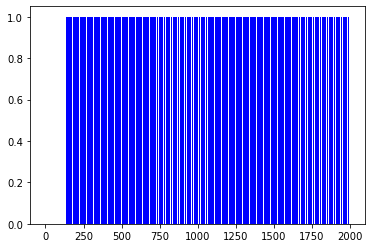

In [40]:
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color = "blue")
plt.show()

# Noise, Discount Factor 추가

In [43]:
register(
    id = 'FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs = {'map_name': '4x4',
             'is_slippery': False}
)
env = gym.make('FrozenLake-v3')

In [44]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

dis = 0.99
num_episodes = 2000

In [45]:
rList = []

for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    
    while not done:
        #노이즈
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))
        new_state, reward, done, _ = env.step(action)
        #감가율
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

Success rate: 0.9385
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0.         0.95099005 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.96059601 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.970299   0.        ]
 [0.         0.9801     0.         0.        ]
 [0.970299   0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.99       0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


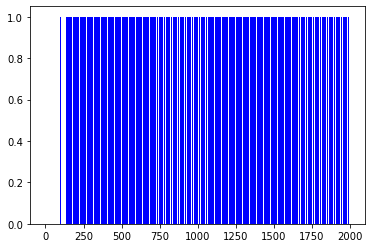

In [46]:
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color = "blue")
plt.show()

# E-greedy도 추가

In [47]:
rList = []

for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    
    e = 1 / ((i // 100) + 1)
    
    while not done:
        
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
       
        new_state, reward, done, _ = env.step(action)
        #감가율
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

Success rate: 0.817
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0.94148015 0.95099005 0.95099005 0.94148015]
 [0.94148015 0.         0.96059601 0.93206535]
 [0.95099005 0.970299   0.93206535 0.96059601]
 [0.96059601 0.         0.93206535 0.93206535]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.96059601]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.970299  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


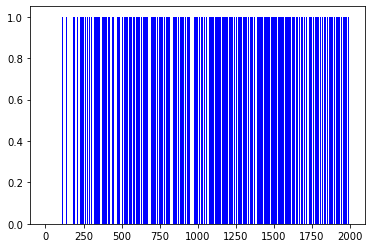

In [48]:
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color = "blue")
plt.show()

# non-deterministic

In [54]:
register(
    id = 'FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs = {'map_name': '4x4',
             'is_slippery': True}
)
env = gym.make('FrozenLake-v3')

In [55]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

dis = 0.99
num_episodes = 2000

In [56]:
rList = []

for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    
    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))
        new_state, reward, done, _ = env.step(action)
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        rAll += reward
        state = new_state
        
    rList.append(rAll)

Success rate: 0.0195
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.99]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]]


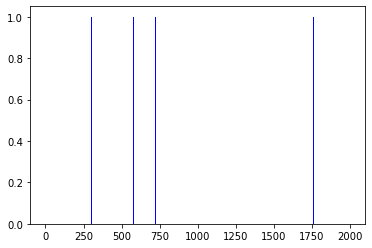

In [57]:
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color = "blue")
plt.show()

## learning rate 추가

In [58]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

learning_rate = 0.85
dis = 0.99
num_episodes = 2000

In [60]:
rList = []

for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    
    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))
        new_state, reward, done, _ = env.step(action)
        #learning rate
        Q[state, action] = (1 - learning_rate) * Q[state, action] + learning_rate * (reward + dis * np.max(Q[new_state, :]))
        rAll += reward
        state = new_state
        
    rList.append(rAll)

Success rate: 0.5325
Final Q-Table Values
LEFT DOWN RIGHT UP
[[5.99745469e-03 4.64535382e-01 0.00000000e+00 4.16323631e-03]
 [0.00000000e+00 1.70762240e-03 2.12962740e-05 3.27502255e-01]
 [0.00000000e+00 0.00000000e+00 6.46992109e-03 2.36892888e-01]
 [2.04389298e-03 9.79819057e-04 0.00000000e+00 1.92322914e-01]
 [6.01095514e-01 8.65571508e-03 3.39719319e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.19219865e-05 4.92144897e-08 7.53308041e-02 1.14177253e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.64426982e-03 2.45426169e-03 0.00000000e+00 6.32873911e-01]
 [0.00000000e+00 4.95874507e-01 0.00000000e+00 1.49588866e-03]
 [7.87760711e-01 0.00000000e+00 0.00000000e+00 1.41985372e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.35879370e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.68427793

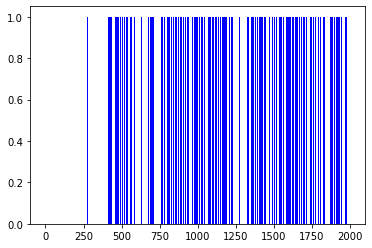

In [61]:
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color = "blue")
plt.show()